In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report
#
import tensorflow as tf
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.layers import Dense # type of layer
from tensorflow.keras.activations import linear, relu, sigmoid,softmax #activation function
from tensorflow.keras import regularizers

In [34]:
X = np.load("C:/Users/deban\Desktop/solo/Handwritting_detection/X.npy")
Y = np.load("C:/Users/deban/Desktop/solo/Handwritting_detection/y.npy")

In [35]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(Y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


## Image Grid Visualization
Sure! Here's the modified version with bold letters enclosed in **:

"The code provided is used to visualize a grid of images with their corresponding labels. Here's a breakdown of what each part of the code does:

The widgvis function is defined to customize the visibility of the figure's toolbar, header, and footer.

A FutureWarning filter is applied to suppress any future warning messages.

The dimensions of the input data X are stored in variables m and n.

A figure and a grid of subplots are created using plt.subplots(8, 8, figsize=(5, 5)). This will create an 8x8 grid of subplots in the figure.

The layout of the figure is adjusted using fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91]). This adjusts the spacing between subplots and sets the rect parameter to define the position of the subplots within the figure.

The widgvis(fig) function is called to customize the visibility of the figure.

A loop is used to iterate over each subplot in axes.flat.

Inside the loop, a random index is selected using np.random.randint(m).

The image corresponding to the random index is reshaped to a 20x20 grid using .reshape((20, 20)).T.

The reshaped image is displayed in the current subplot using ax.imshow(X_random_reshaped, cmap='gray').

The label corresponding to the random index is displayed as the title of the subplot using ax.set_title(Y[random_index, 0]).

The axes are turned off using ax.set_axis_off() to hide the axis ticks and labels.

Finally, the overall title of the figure is set using fig.suptitle("Label, image", fontsize=14).

This code generates a grid of 64 subplots, each displaying a random image from the dataset with its corresponding label. The images are displayed in grayscale."

In [36]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

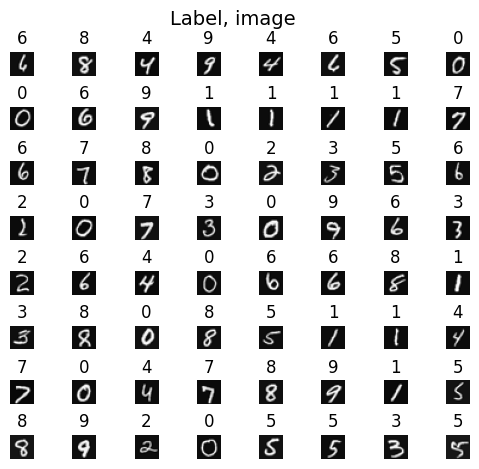

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell. Working not known

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)


In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.9,random_state=1,stratify=Y)

## Model
In this code, a neural network model is defined and trained using Keras. Here's a breakdown of what each part of the code does:

The dimensions of the input data X are stored in variables m and n.
Regularization parameter lamb and learning rate l_r are set.
The random seed is set using tf.random.set_seed(1234) for consistent results.
The neural network model is defined using the Sequential API.
Three dense layers are added to the model with specified activations and regularization.
The model is compiled with the specified loss function and optimizer.
The model is trained using the training data x_train and y_train for a specified number of epochs and batch size.
After training, the weights and biases of each layer are obtained using get_weights() method.
The shapes of the weights and biases for each layer are printed.
This code provides a basic implementation of a neural network model using Keras and demonstrates the training process and extraction of layer weights and biases.

In [142]:
m,n=X.shape
lamb=0.001
l_r=0.001

In [143]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [                
        tf.keras.layers.InputLayer((n,)),
        tf.keras.layers.Dense(25, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(lamb), name="L1"),
        tf.keras.layers.Dense(15, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(lamb), name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
    ], name = "my_model" 
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(l_r)
    )

In [144]:
hist=model.fit(
    x_train, y_train,
    epochs=400
)

Epoch 1/400
141/141 [==============================] - 1s 1ms/step - loss: 1.6364
Epoch 2/400
141/141 [==============================] - 0s 1ms/step - loss: 0.7433
Epoch 3/400
141/141 [==============================] - 0s 1ms/step - loss: 0.5274
Epoch 4/400
141/141 [==============================] - 0s 1ms/step - loss: 0.4434
Epoch 5/400
141/141 [==============================] - 0s 1ms/step - loss: 0.3992
Epoch 6/400
141/141 [==============================] - 0s 1ms/step - loss: 0.3646
Epoch 7/400
141/141 [==============================] - 0s 1ms/step - loss: 0.3454
Epoch 8/400
141/141 [==============================] - 0s 1ms/step - loss: 0.3264
Epoch 9/400
141/141 [==============================] - 0s 1ms/step - loss: 0.3135
Epoch 10/400
141/141 [==============================] - 0s 1ms/step - loss: 0.3004
Epoch 11/400
141/141 [==============================] - 0s 1ms/step - loss: 0.2886
Epoch 12/400
141/141 [==============================] - 0s 1ms/step - loss: 0.2787
Epoch 13/400


## Extra features

In [121]:
[layer1, layer2, layer3] = model.layers

In [122]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [123]:
def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    widgvis(fig)
    X_reshaped = X.reshape((20,20)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

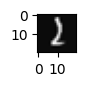

1/1 [==============================] - 0s 37ms/step
 predicting a Two: 
[[-106.9447    -44.994537   10.826374  -25.44604   -82.62444   -85.25461
   -54.919777  -32.1801    -67.922104  -86.001366]]
 Largest Prediction index: 2


In [124]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

## Accuracy
**Precision:** It measures the proportion of correctly predicted instances among the predicted instances for each class. Higher precision values indicate fewer false positives. The overall precision values for most classes are relatively high, ranging from 0.73 to 1.00, which indicates that the model has a good ability to classify the corresponding numbers.

**Recall:** It measures the proportion of correctly predicted instances among the actual instances of each class. Higher recall values indicate fewer false negatives. The overall recall values for most classes are above 0.80, with the lowest being 0.74. This suggests that the model can successfully identify a significant portion of the instances for each number.

**F1-score:** It is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. The overall F1-scores for most classes are above 0.80, with some reaching as high as 0.96. This indicates that the model achieves a good balance between precision and recall.

**Accuracy:** It measures the proportion of correctly classified instances among all instances. The overall accuracy of 0.89 indicates that the model correctly predicts around 89% of the instances.

**Macro Avg and Weighted Avg:** These metrics provide an average of precision, recall, and F1-score across all classes. The macro avg calculates the unweighted mean of the metrics, while the weighted avg takes class imbalance into account. In both cases, the values are around 0.89, indicating a balanced performance across different classes.

Based on these evaluation metrics, it can be concluded that the model is performing reasonably well in detecting numbers from 0 to 9. However, the specific suitability of the model depends on the application and the desired level of performance. Further analysis and fine-tuning may be necessary to improve the model's performance, if required.

In [158]:
y_pred = tf.nn.softmax(model.predict(x_train))
y_pred_labels_train = np.argmax(y_pred, axis=1)
report = classification_report(y_train, y_pred_labels_train)
print("Classification Report:")
print(report)

  1/141 [..............................] - ETA: 5s

141/141 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00       450
           2       1.00      1.00      1.00       450
           3       1.00      1.00      1.00       450
           4       1.00      1.00      1.00       450
           5       1.00      1.00      1.00       450
           6       1.00      1.00      1.00       450
           7       1.00      1.00      1.00       450
           8       1.00      1.00      1.00       450
           9       1.00      1.00      1.00       450

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



In [159]:
y_pred = tf.nn.softmax(model.predict(x_test))
y_pred_labels = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_labels)
print("Classification Report:")
print(report)

16/16 [==============================] - 0s 1ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.98      0.96      0.97        50
           2       0.94      0.90      0.92        50
           3       0.93      0.86      0.90        50
           4       0.88      0.90      0.89        50
           5       0.86      0.96      0.91        50
           6       0.94      1.00      0.97        50
           7       0.96      0.86      0.91        50
           8       0.92      0.88      0.90        50
           9       0.87      0.90      0.88        50

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [160]:
test_accuracy = np.mean(y_pred_labels == y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.1


In [147]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    widgvis(fig)
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

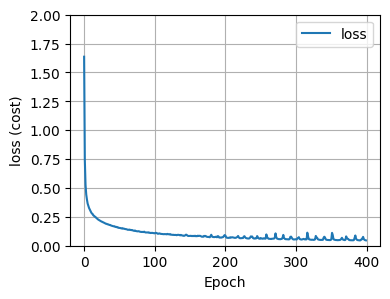

In [154]:
plot_loss_tf(hist)

1/1 [==============================] - 0s 23ms/step


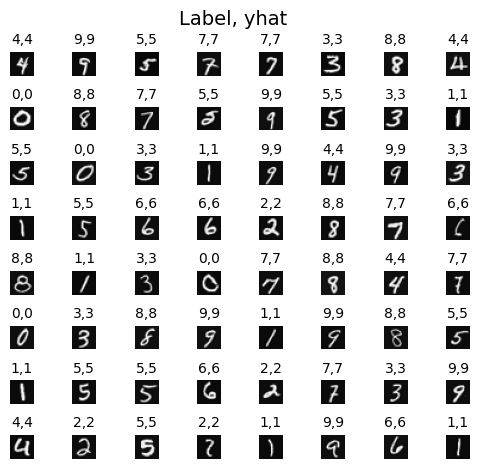

In [155]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{Y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [163]:
def display_errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]
        widgvis(fig)

        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((20,20)).T

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,400))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
    return(len(idxs))

1/1 [==============================] - 0s 22ms/step
40 errors out of 5000 images


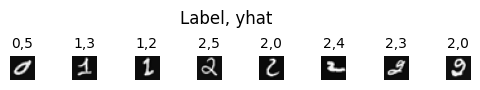

In [164]:
print( f"{display_errors(model,X,Y)} errors out of {len(X)} images")